# Sentiment Analysis

# Environment

# Dependencies

In [1]:
%matplotlib inline
from sklearn import metrics
import seaborn as sn
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score,accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from sklearn import model_selection, preprocessing,svm

# Table of Contents

# Data Exploration

Once the environment is setup and dependencies are installed it is time to get started and explore our data set. For this particular article I have used a dataset consisting of more than 1000000 textual sentences along with their respective targets. The targets in this case are the sentiments which are positive and negative. So this becomes a binary classification problem.

In [2]:
loc = '/home/codersarts/Desktop/data/sent.csv'
data = pd.read_csv(loc,engine='python')
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


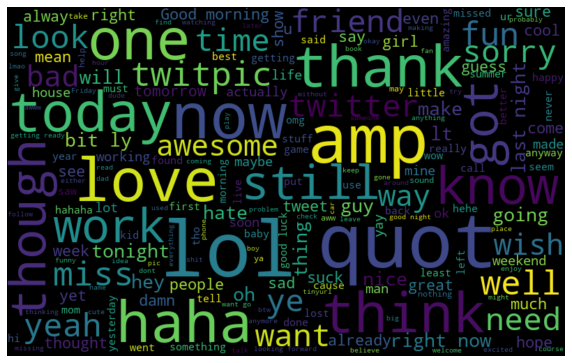

In [3]:
all_words = ' '.join([text for text in data['SentimentText']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Data Prepration & Feature Engineering

In [3]:
data_new = data.iloc[:3000]
data_new.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


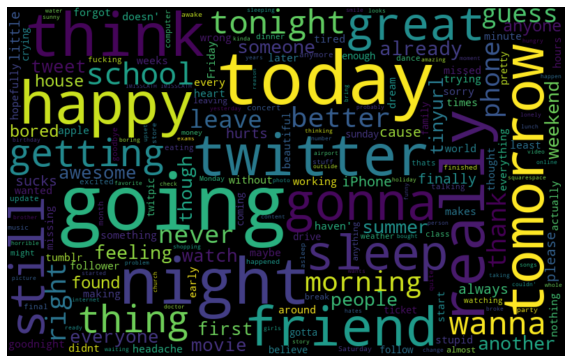

In [26]:
data.replace(r'\b\w{1,4}\b','', regex =True, inplace = True)
all_words = ' '.join([text for text in data_new['SentimentText']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [4]:
vectorizer = CountVectorizer()
vectorizer.fit(data_new['SentimentText'])
vec = vectorizer.transform(data_new['SentimentText'])
data['encoded_text'] = vec
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(vec,data_new['Sentiment'],test_size=0.1)
data.head()

,ItemID,Sentiment,SentimentText,encoded_text
0,1,0,is so sad for my APL frie...,"(0, 439)\t1\n (0, 2351)\t1\n (0, 2409)\t1\..."
1,2,0,I missed the New Moon trail...,"(0, 439)\t1\n (0, 2351)\t1\n (0, 2409)\t1\..."
2,3,1,omg its already 7:30 :O,"(0, 439)\t1\n (0, 2351)\t1\n (0, 2409)\t1\..."
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,"(0, 439)\t1\n (0, 2351)\t1\n (0, 2409)\t1\..."
4,5,0,i think mi bf is cheating on me!!! ...,"(0, 439)\t1\n (0, 2351)\t1\n (0, 2409)\t1\..."


In [5]:
Train_X.shape,Test_X.shape

((2700, 6681), (300, 6681))

# Model Training

In [6]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X , Train_Y)
predictions_SVM = SVM.predict(Test_X)

# Model Evaluation

In [7]:
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print(classification_report(Test_Y,predictions_SVM))
print(f1_score(Test_Y,predictions_SVM, average='weighted'))

SVM Accuracy Score ->  76.33333333333333
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       225
           1       0.53      0.51      0.52        75

    accuracy                           0.76       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.76      0.76      0.76       300

0.7617020318061


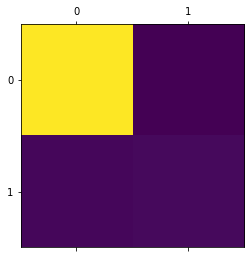

In [10]:
cm=metrics.confusion_matrix(Test_Y,predictions_SVM)
plt.matshow(cm)

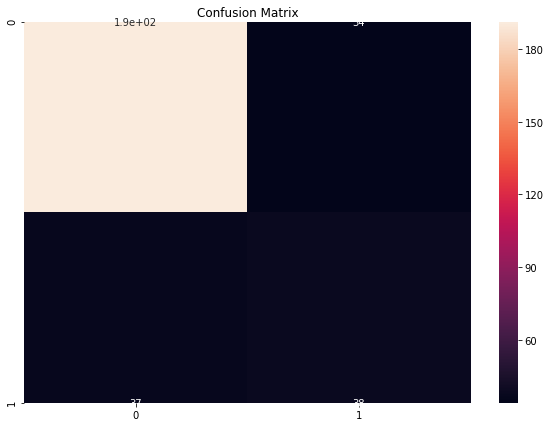

In [11]:
plt.figure(figsize = (10,7))
ax= plt.subplot()
ax.set_title('Confusion Matrix'); 
sn.heatmap(cm, annot=True,ax = ax)

In [12]:
cm

array([[191,  34],
       [ 37,  38]])

In [13]:
df = pd.DataFrame(Test_Y)
df['pred'] = predictions_SVM
sent = df['Sentiment']
pred = df['pred']
df.head()

,Sentiment,pred
543,0,1
22,1,1
1432,0,0
529,0,0
648,1,1


In [14]:
negative = [i for i in df['pred'] if i ==0]
positive = [i for i in df['pred'] if i ==1]

len(negative),len(positive)

(228, 72)

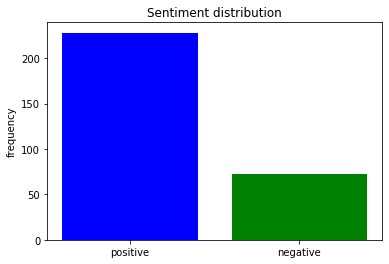

In [41]:
plt.title('Sentiment distribution')
cat = ['positive', 'negative']
freq = [len(negative),len(positive)]
plt.ylabel('frequency')
plt.bar(cat,freq,color= ['blue','green'])

plt.show()

we validated our model on 300 rows of text. The bar plot clearly shows  the distribution of positive and negative prediction in the validation set.